In [72]:
# IMPORT DES BIBLIOTHÈQUES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')

# CONFIGURATION GRAPHIQUE
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# CHARGEMENT DU DATASET

df = pd.read_csv('dataset_final.csv')


In [73]:
display(df)

,offre_id,titre,entreprise,localisation,contrat,scraped_at,url,mots_cles,domaine,region,salaire_impute
0,73452413,Employé de Ménage-Repassage - à Domicile - - S...,O2,Saint-Martin-d'Hères - 38,CDI,2025-12-06 15:35:15,https://www.hellowork.com/fr-fr/emplois/734524...,"Saint-Martin-d'Hères - 38, CDI, Temps partiel,...",Services aux Personnes,Saint-Martin-d'Hères,1804.960000
1,73438755,Technico-Commercial Itinérant H/F,Roussely,Évreux - 27,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Évreux - 27, CDI, Bac +2, Bac +3, Bac +4, Dist...",Distribution,Évreux,2404.641512
2,73438741,Technico-Commercial Itinérant H/F,Roussely,Chartres - 28,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Chartres - 28, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,Chartres,3281.000000
3,73438342,Conseiller de Vente - Clisson 44 H/F,Pallard,Clisson - 44,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Clisson - 44, CDI, Bac, BTP, Distribution • Co...",Distribution,Clisson,2404.641512
4,73438322,Chargé d'Affaires Cnd Nord H/F,ALPHA,Rouen - 76,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Rouen - 76, CDI, Télétravail partiel, Bac +2, ...",Industrie Manufacturière,Rouen,3333.330000
...,...,...,...,...,...,...,...,...,...,...,...
5404,71136507,Chargé d'Opérations H/F,OPH de la Meuse,Bar-le-Duc - 55,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711365...,"Bar-le-Duc - 55, CDI, Bac +5, Services aux Per...",Services aux Personnes,Bar-le-Duc,3300.000000
5405,71130852,Dessinateur Projeteur H/F,SOLUTIONS COMPETENCES,Poitiers - 86,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711308...,"Poitiers - 86, CDI, Bac +2, Services aux Entre...",Services aux Entreprises,Poitiers,2599.500000
5406,71135657,Responsable de Magasin 36H - CDI Temps Plein H/F,Naturalia France,Paris 9e - 75,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711356...,"Paris 9e - 75, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,Paris 9e,2404.641512
5407,71131527,Manager de Rayons Frais ou Pgc H/F,Auchan Retail France,Paris - 75,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711315...,"Paris - 75, CDI, Bac, Bac +2, Distribution • C...",Distribution,Paris,3000.000000


In [74]:
# CLUSTERING SUR LES MOTS-CLES
print("\n=== CLUSTERING SUR LES MOTS-CLES ===")


# 1. Préparation des mots-clés
print("1. Préparation des mots-clés...")
df['mots_cles'] = df['mots_cles'].fillna('').astype(str)

# 2. Vectorisation TF-IDF
print("2. Vectorisation TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=500
)
X = vectorizer.fit_transform(df['mots_cles'])

# 3. Clustering KMeans
print("3. Clustering KMeans...")
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster_mots_cles'] = kmeans.fit_predict(X)

# 4. Analyse des clusters
print("4. Analyse des résultats...")
print(f"{n_clusters} clusters créés à partir des mots-clés")
print("Distribution :")
for cluster_id in range(n_clusters):
    count = (df['cluster_mots_cles'] == cluster_id).sum()
    print(f"  Cluster {cluster_id}: {count} offres")


=== CLUSTERING SUR LES MOTS-CLES ===
1. Préparation des mots-clés...
2. Vectorisation TF-IDF...
3. Clustering KMeans...
4. Analyse des résultats...
5 clusters créés à partir des mots-clés
Distribution :
  Cluster 0: 1395 offres
  Cluster 1: 225 offres
  Cluster 2: 2925 offres
  Cluster 3: 334 offres
  Cluster 4: 530 offres


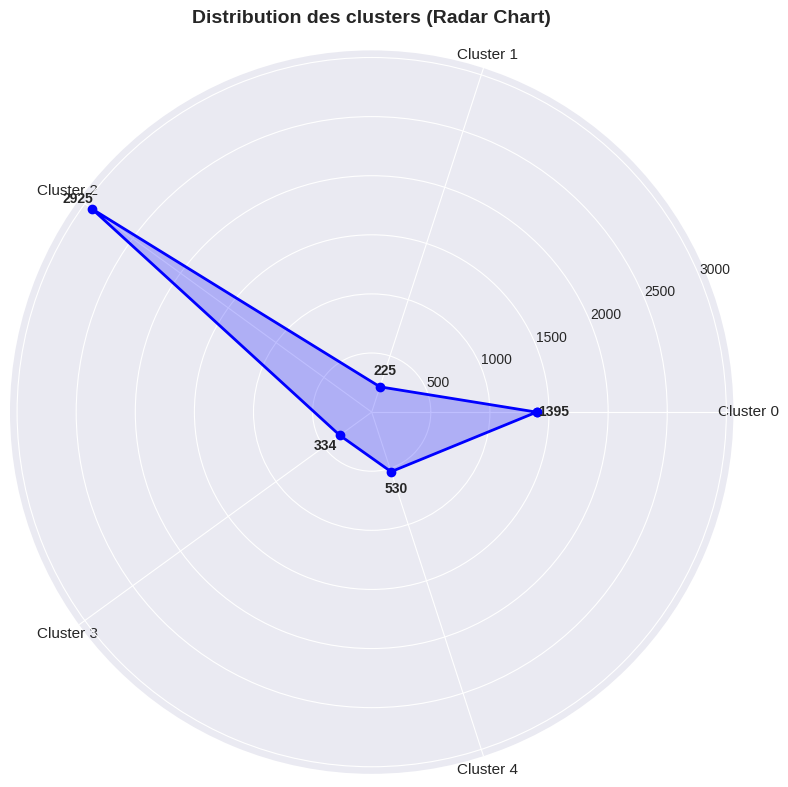

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
cluster_counts = df['cluster_mots_cles'].value_counts().sort_index()
clusters = list(cluster_counts.index)
counts = list(cluster_counts.values)

# Préparer les données pour le radar
N = len(clusters)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
counts = counts + counts[:1]  # Fermer le polygone
angles += angles[:1]

ax = plt.subplot(111, projection='polar')
ax.plot(angles, counts, 'o-', linewidth=2, color='blue')
ax.fill(angles, counts, alpha=0.25, color='blue')

# Ajouter les labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'Cluster {c}' for c in clusters], fontsize=11)

# Ajouter les valeurs
for angle, count, cluster in zip(angles[:-1], counts[:-1], clusters):
    ax.text(angle, count + max(counts)*0.05, f'{count}',
            ha='center', va='center', fontweight='bold')

plt.title('Distribution des clusters (Radar Chart)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [76]:
# CLASSIFICATION (HAUT/BAS SALAIRE)
print("\n=== CLASSIFICATION HAUT/BAS SALAIRE ===")


# 1. Préparation des données
print("1. Préparation des données...")

# Utiliser 'salaire_impute' comme colonne de salaire
salaire_col = 'salaire_impute'

print(f"   Colonne utilisée: {salaire_col}")
print(f"   Type: {df[salaire_col].dtype}")
print(f"   Valeurs non-nulles: {df[salaire_col].notna().sum()}/{len(df)}")

# 2. Préparation de la target
print("2. Préparation de la target...")

# Calculer le seuil (médiane)
seuil = df[salaire_col].median()
print(f"   Seuil (médiane): {seuil:.2f}€")

# Créer les catégories
df['salaire_categorie'] = df[salaire_col].apply(
    lambda x: 1 if pd.notna(x) and x > seuil else 0 if pd.notna(x) else -1
)

# Filtrer les données avec salaire valide
df_classif = df[df['salaire_categorie'] != -1].copy()
print(f"   Offres pour classification: {len(df_classif)}")
print(f"   Bas salaire (0): {(df_classif['salaire_categorie'] == 0).sum()}")
print(f"   Haut salaire (1): {(df_classif['salaire_categorie'] == 1).sum()}")




=== CLASSIFICATION HAUT/BAS SALAIRE ===
1. Préparation des données...
   Colonne utilisée: salaire_impute
   Type: float64
   Valeurs non-nulles: 5409/5409
2. Préparation de la target...
   Seuil (médiane): 2758.35€
   Offres pour classification: 5409
   Bas salaire (0): 2749
   Haut salaire (1): 2660


In [77]:
# 3. Préparation des features
print("3. Préparation des features...")
X_features = vectorizer.transform(df_classif['mots_cles'])
y = df_classif['salaire_categorie']

# 4. Split train/test
print("4. Split train/test...")
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)

train_samples = X_train.shape[0]
test_samples = X_test.shape[0]
print(f"   Train: {train_samples} offres")
print(f"   Test: {test_samples} offres")



3. Préparation des features...
4. Split train/test...
   Train: 4327 offres
   Test: 1082 offres


In [78]:
print("\n=== CLASSIFICATION HAUT/BAS SALAIRE (Réseau de Neurones) ===")

# 5. Entraînement avec réseau de neurones
print("5. Entraînement du modèle (réseau de neurones)...")

# Configuration du réseau de neurones
model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 couches cachées: 100 puis 50 neurones
    activation='relu',              # Fonction d'activation ReLU
    solver='adam',                  # Optimiseur Adam
    alpha=0.0001,                   # Terme de régularisation L2
    batch_size='auto',              # Taille de batch automatique
    learning_rate='adaptive',       # Taux d'apprentissage adaptatif
    learning_rate_init=0.001,       # Taux d'apprentissage initial
    max_iter=500,                   # Nombre maximum d'itérations
    random_state=42,
    early_stopping=True,            # Arrêt précoce pour éviter l'overfitting
    validation_fraction=0.1,        # 10% des données pour validation
    n_iter_no_change=10,            # Arrêt si pas d'amélioration après 10 itérations
    verbose=False                   # Ne pas afficher les logs d'entraînement
)

# Entraînement du modèle
model.fit(X_train, y_train)

print(f"   Nombre d'itérations effectuées: {model.n_iter_}")
print(f"   Loss finale: {model.loss_:.4f}")
print(f"   Nombre de couches: {model.n_layers_}")


=== CLASSIFICATION HAUT/BAS SALAIRE (Réseau de Neurones) ===
5. Entraînement du modèle (réseau de neurones)...
   Nombre d'itérations effectuées: 15
   Loss finale: 0.2468
   Nombre de couches: 4


6. Évaluation du modèle...

Résultats de la classification (Réseau de Neurones):
   Accuracy: 0.839
   Train size: 4327 offres
   Test size: 1082 offres

   Rapport de classification détaillé:
              precision    recall  f1-score   support

 Bas salaire       0.85      0.83      0.84       550
Haut salaire       0.83      0.85      0.84       532

    accuracy                           0.84      1082
   macro avg       0.84      0.84      0.84      1082
weighted avg       0.84      0.84      0.84      1082


7. Visualisation des résultats...


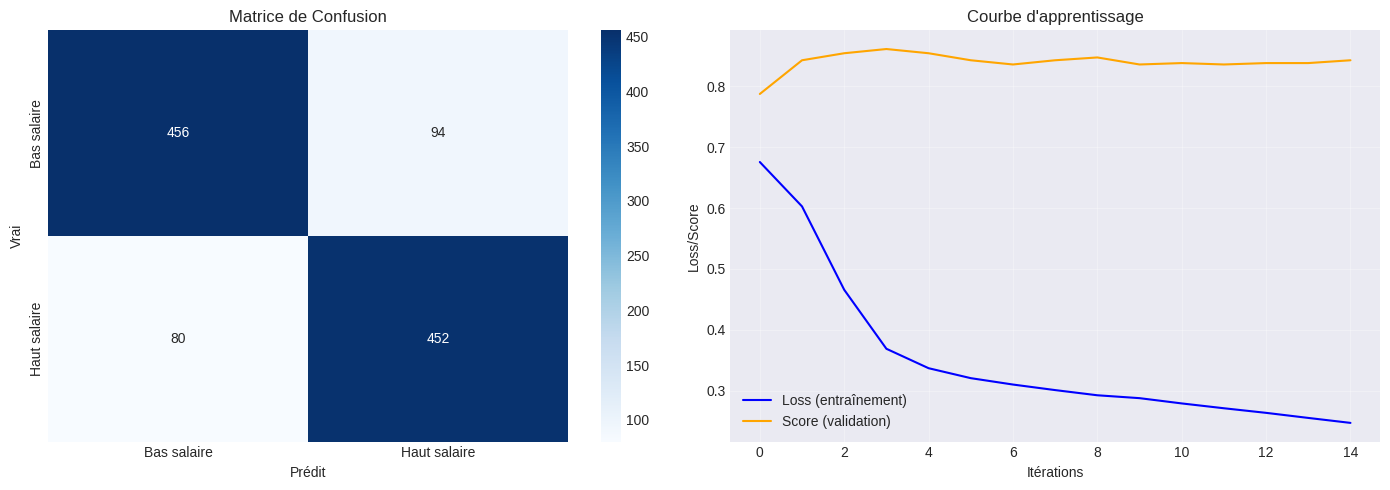


8. Application des prédictions...
   Prédictions effectuées: 5409 offres
   Distribution prédite: 2668 bas salaire, 2741 haut salaire

   Probabilités moyennes:
   - Bas salaire: 0.499
   - Haut salaire: 0.501

Classification par réseau de neurones terminée!


In [79]:
# 6. Évaluation
print("6. Évaluation du modèle...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision_0 = (y_pred[y_test == 0] == 0).sum() / (y_pred == 0).sum() if (y_pred == 0).sum() > 0 else 0
precision_1 = (y_pred[y_test == 1] == 1).sum() / (y_pred == 1).sum() if (y_pred == 1).sum() > 0 else 0
recall_0 = (y_pred[y_test == 0] == 0).sum() / (y_test == 0).sum()
recall_1 = (y_pred[y_test == 1] == 1).sum() / (y_test == 1).sum()

print(f"\nRésultats de la classification (Réseau de Neurones):")
print(f"   Accuracy: {accuracy:.3f}")
print(f"   Train size: {train_samples} offres")
print(f"   Test size: {test_samples} offres")
print(f"\n   Rapport de classification détaillé:")
print(classification_report(y_test, y_pred,
                          target_names=['Bas salaire', 'Haut salaire']))

# 7. Visualisation des résultats
print("\n7. Visualisation des résultats...")

# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sous-graphique 1: Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bas salaire', 'Haut salaire'],
            yticklabels=['Bas salaire', 'Haut salaire'],
            ax=axes[0])
axes[0].set_title('Matrice de Confusion')
axes[0].set_ylabel('Vrai')
axes[0].set_xlabel('Prédit')

# Sous-graphique 2: Courbe d'apprentissage (si disponible)
if hasattr(model, 'loss_curve_'):
    axes[1].plot(model.loss_curve_, label='Loss (entraînement)', color='blue')
    if hasattr(model, 'validation_scores_'):
        axes[1].plot(model.validation_scores_, label='Score (validation)', color='orange')
    axes[1].set_title('Courbe d\'apprentissage')
    axes[1].set_xlabel('Itérations')
    axes[1].set_ylabel('Loss/Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    # Afficher les probabilités prédites
    from sklearn.calibration import calibration_curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
    axes[1].plot(prob_pred, prob_true, marker='o', label='Modèle')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Parfait')
    axes[1].set_title('Courbe de calibration')
    axes[1].set_xlabel('Probabilité prédite')
    axes[1].set_ylabel('Fraction de positifs')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Prédictions sur tout le dataset
print("\n8. Application des prédictions...")

# Prédire pour toutes les offres
X_all = vectorizer.transform(df['mots_cles'])
predictions = model.predict(X_all)
df['salaire_pred_categorie_nn'] = predictions

# Ajouter aussi les probabilités
probabilities = model.predict_proba(X_all)
df['salaire_proba_bas'] = probabilities[:, 0]
df['salaire_proba_haut'] = probabilities[:, 1]

print(f"   Prédictions effectuées: {len(df)} offres")
print(f"   Distribution prédite: {(df['salaire_pred_categorie_nn'] == 0).sum()} bas salaire, "
      f"{(df['salaire_pred_categorie_nn'] == 1).sum()} haut salaire")

# Statistiques sur les probabilités
print(f"\n   Probabilités moyennes:")
print(f"   - Bas salaire: {df['salaire_proba_bas'].mean():.3f}")
print(f"   - Haut salaire: {df['salaire_proba_haut'].mean():.3f}")

print("\nClassification par réseau de neurones terminée!")

In [80]:
# FINAL : AJOUT DES PRÉDICTIONS AU DATAFRAME

print("\n" + "="*50)
print("AJOUT DES PRÉDICTIONS AU JEU DE DONNÉES")
print("="*50)

# 9. Vérification et ajout final des colonnes
print("\n9. Vérification des nouvelles colonnes ajoutées...")

# Liste des colonnes originales (à adapter selon votre dataset)
colonnes_originales = ['offre_id', 'titre', 'entreprise', 'localisation',
                      'contrat', 'scraped_at', 'url', 'mots_cles',
                      'domaine', 'region', 'salaire_impute']

# Colonnes créées par nos modèles
colonnes_crees_par_modeles = []

# 9.1. Vérifier les colonnes de clustering
if 'cluster_mots_cles' in df.columns:
    colonnes_crees_par_modeles.append('cluster_mots_cles')
    print(f"cluster_mots_cles : ajouté ({df['cluster_mots_cles'].nunique()} clusters)")

# 9.2. Vérifier les colonnes de classification
if 'salaire_pred_categorie' in df.columns:
    colonnes_crees_par_modeles.append('salaire_pred_categorie')
    print(f"salaire_pred_categorie : ajouté (Logistic Regression)")

if 'salaire_pred_categorie_nn' in df.columns:
    colonnes_crees_par_modeles.append('salaire_pred_categorie_nn')
    colonnes_crees_par_modeles.append('salaire_proba_bas')
    colonnes_crees_par_modeles.append('salaire_proba_haut')
    print(f"salaire_pred_categorie_nn : ajouté (Réseau de Neurones)")
    print(f"salaire_proba_bas : ajouté (probabilités)")
    print(f"salaire_proba_haut : ajouté (probabilités)")

# 9.3. Vérifier les colonnes de transformation des salaires
if 'salaire_normalise' in df.columns:
    colonnes_crees_par_modeles.append('salaire_normalise')
    print(f"salaire_normalise : ajouté")

if 'salaire_original' in df.columns:
    colonnes_crees_par_modeles.append('salaire_original')
    print(f"salaire_original : ajouté")

if 'salaire_categorie' in df.columns:
    colonnes_crees_par_modeles.append('salaire_categorie')
    print(f"salaire_categorie : ajouté")


AJOUT DES PRÉDICTIONS AU JEU DE DONNÉES

9. Vérification des nouvelles colonnes ajoutées...
cluster_mots_cles : ajouté (5 clusters)
salaire_pred_categorie_nn : ajouté (Réseau de Neurones)
salaire_proba_bas : ajouté (probabilités)
salaire_proba_haut : ajouté (probabilités)
salaire_categorie : ajouté


In [81]:
# 10. Statistiques finales
print("\n" + "-"*50)
print("STATISTIQUES FINALES")
print("-"*50)

print(f"Nombre total d'offres: {len(df)}")
print(f"Colonnes originales: {len(colonnes_originales)}")
print(f"Nouvelles colonnes créées: {len(colonnes_crees_par_modeles)}")
print(f"Total colonnes dans le DataFrame: {len(df.columns)}")

# 11. Aperçu des données avec les nouvelles colonnes
print("\n" + "-"*50)
print("APERÇU DES DONNÉES AVEC PRÉDICTIONS")
print("-"*50)

# Sélectionner un échantillon d'offres avec les prédictions
colonnes_a_afficher = ['titre', 'entreprise', 'region']

# Ajouter les colonnes de prédictions si elles existent
for col in ['cluster_mots_cles', 'salaire_pred_categorie',
            'salaire_pred_categorie_nn', 'salaire_normalise']:
    if col in df.columns:
        colonnes_a_afficher.append(col)

print("Échantillon de 5 offres avec prédictions :")
print(df[colonnes_a_afficher].head().to_string())


--------------------------------------------------
STATISTIQUES FINALES
--------------------------------------------------
Nombre total d'offres: 5409
Colonnes originales: 11
Nouvelles colonnes créées: 5
Total colonnes dans le DataFrame: 16

--------------------------------------------------
APERÇU DES DONNÉES AVEC PRÉDICTIONS
--------------------------------------------------
Échantillon de 5 offres avec prédictions :
                                                                             titre entreprise                region  cluster_mots_cles  salaire_pred_categorie_nn
0  Employé de Ménage-Repassage - à Domicile - - St Martin d'Hères et Alentours H/F         O2  Saint-Martin-d'Hères                  4                          0
1                                                Technico-Commercial Itinérant H/F   Roussely                Évreux                  2                          0
2                                                Technico-Commercial Itinérant H/F   Rouss

In [82]:
# 12. Exemple d'analyse possible avec les nouvelles colonnes
print("\n" + "-"*50)
print("EXEMPLES D'ANALYSES POSSIBLES")
print("-"*50)

if 'cluster_mots_cles' in df.columns and 'salaire_pred_categorie_nn' in df.columns:
    print("1. Trouver les clusters avec le plus de hauts salaires :")
    cluster_stats = df.groupby('cluster_mots_cles')['salaire_pred_categorie_nn'].mean()
    for cluster, pct in cluster_stats.items():
        print(f"   Cluster {cluster}: {pct*100:.1f}% de hauts salaires")

    print("\n2. Offres avec la plus haute probabilité de haut salaire :")
    if 'salaire_proba_haut' in df.columns:
        top_offres = df.nlargest(3, 'salaire_proba_haut')[['titre', 'salaire_proba_haut', 'cluster_mots_cles']]
        for idx, row in top_offres.iterrows():
            print(f"   • {row['titre']} (Cluster {row['cluster_mots_cles']}, proba: {row['salaire_proba_haut']:.2f})")

# 13. Sauvegarde optionnelle
print("\n" + "="*50)
print("OPTION DE SAUVEGARDE")
print("="*50)

reponse = input("Voulez-vous sauvegarder le DataFrame avec les prédictions ? (o/n) : ")

if reponse.lower() == 'o':
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nom_fichier = f"offres_emploi_avec_predictions_{timestamp}.csv"

    # Sauvegarde
    df.to_csv(nom_fichier, index=False, encoding='utf-8-sig')
    print(f"\nDonnées sauvegardées dans : {nom_fichier}")
    print(f"   • {len(df)} offres")
    print(f"   • {len(df.columns)} colonnes")
    print(f"   • Taille du fichier : {df.memory_usage().sum() / 1024 / 1024:.2f} MB")
else:
    print("\nDonnées conservées en mémoire dans la variable 'df'")

print("\n" + "="*50)
print("ANALYSE COMPLÈTEMENT TERMINÉE !")
print("="*50)
print("\nVotre DataFrame 'df' contient maintenant :")
print(f"• Les données originales ({len(colonnes_originales)} colonnes)")
print(f"• Les prédictions des modèles ({len(colonnes_crees_par_modeles)} nouvelles colonnes)")
print(f"• {len(df)} offres d'emploi analysées")




--------------------------------------------------
EXEMPLES D'ANALYSES POSSIBLES
--------------------------------------------------
1. Trouver les clusters avec le plus de hauts salaires :
   Cluster 0: 91.8% de hauts salaires
   Cluster 1: 56.4% de hauts salaires
   Cluster 2: 36.4% de hauts salaires
   Cluster 3: 77.8% de hauts salaires
   Cluster 4: 1.3% de hauts salaires

2. Offres avec la plus haute probabilité de haut salaire :
   • Mechanical & Piping Prefabrication Supervisor H/F (Cluster 0, proba: 0.99)
   • Ingénieur Qualité H/F (Cluster 0, proba: 0.99)
   • Site Manager - Construction Manager à Kielce Pologne H/F (Cluster 0, proba: 0.99)

OPTION DE SAUVEGARDE
Voulez-vous sauvegarder le DataFrame avec les prédictions ? (o/n) : o

Données sauvegardées dans : offres_emploi_avec_predictions_20251210_194215.csv
   • 5409 offres
   • 16 colonnes
   • Taille du fichier : 0.64 MB

ANALYSE COMPLÈTEMENT TERMINÉE !

Votre DataFrame 'df' contient maintenant :
• Les données originales (

In [83]:
display(df)

,offre_id,titre,entreprise,localisation,contrat,scraped_at,url,mots_cles,domaine,region,salaire_impute,cluster_mots_cles,salaire_categorie,salaire_pred_categorie_nn,salaire_proba_bas,salaire_proba_haut
0,73452413,Employé de Ménage-Repassage - à Domicile - - S...,O2,Saint-Martin-d'Hères - 38,CDI,2025-12-06 15:35:15,https://www.hellowork.com/fr-fr/emplois/734524...,"Saint-Martin-d'Hères - 38, CDI, Temps partiel,...",Services aux Personnes,Saint-Martin-d'Hères,1804.960000,4,0,0,0.967998,0.032002
1,73438755,Technico-Commercial Itinérant H/F,Roussely,Évreux - 27,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Évreux - 27, CDI, Bac +2, Bac +3, Bac +4, Dist...",Distribution,Évreux,2404.641512,2,0,0,0.674784,0.325216
2,73438741,Technico-Commercial Itinérant H/F,Roussely,Chartres - 28,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Chartres - 28, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,Chartres,3281.000000,2,1,0,0.849843,0.150157
3,73438342,Conseiller de Vente - Clisson 44 H/F,Pallard,Clisson - 44,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Clisson - 44, CDI, Bac, BTP, Distribution • Co...",Distribution,Clisson,2404.641512,2,0,0,0.847848,0.152152
4,73438322,Chargé d'Affaires Cnd Nord H/F,ALPHA,Rouen - 76,CDI,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Rouen - 76, CDI, Télétravail partiel, Bac +2, ...",Industrie Manufacturière,Rouen,3333.330000,2,1,1,0.083835,0.916165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,71136507,Chargé d'Opérations H/F,OPH de la Meuse,Bar-le-Duc - 55,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711365...,"Bar-le-Duc - 55, CDI, Bac +5, Services aux Per...",Services aux Personnes,Bar-le-Duc,3300.000000,2,1,0,0.803472,0.196528
5405,71130852,Dessinateur Projeteur H/F,SOLUTIONS COMPETENCES,Poitiers - 86,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711308...,"Poitiers - 86, CDI, Bac +2, Services aux Entre...",Services aux Entreprises,Poitiers,2599.500000,2,0,0,0.904416,0.095584
5406,71135657,Responsable de Magasin 36H - CDI Temps Plein H/F,Naturalia France,Paris 9e - 75,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711356...,"Paris 9e - 75, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,Paris 9e,2404.641512,1,0,0,0.838825,0.161175
5407,71131527,Manager de Rayons Frais ou Pgc H/F,Auchan Retail France,Paris - 75,CDI,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711315...,"Paris - 75, CDI, Bac, Bac +2, Distribution • C...",Distribution,Paris,3000.000000,1,1,0,0.778668,0.221332
